# Gradient Descent from Scratch
# Author: Aman (Documenting my ML learning journey)

"""
In this notebook, I am trying to understand Gradient Descent (GD) — not just use it blindly.
My goal is to implement it from scratch, visualize its working, and compare it with sklearn’s LinearRegression.

Important: I’ll start with the simplest version, i.e., **Batch Gradient Descent**,
which uses *all training samples* to compute gradients at every step.

I will deliberately use just **one feature** (Median Income) from the California Housing dataset
to keep things intuitive and visualizable. Real models use all features, but
I want to master the concept first.
"""


# Gradient Descent (Batch) — Learning Journey

---

## 1. What is Gradient Descent?

Gradient Descent (GD) is an **optimization algorithm** that helps machine learning models “learn” by **iteratively updating their parameters** to minimize a loss function (like Mean Squared Error in regression or Cross-Entropy in classification).  

*Intuition:*  
Imagine you are standing on a foggy hill and want to reach the bottom.  
- You can’t see the valley.  
- So you **feel the slope beneath your feet** (the gradient) and take a step downhill.  
- You repeat this until you reach the bottom (minimum error).  

In short, GD is like **taking smart steps downhill based on the slope** of your error surface.

---

## 2. Why is Gradient Descent Important?

1. Many machine learning algorithms (Linear Regression, Logistic Regression, Neural Networks) **cannot be solved analytically** for large datasets or complex models.  
2. GD provides a **general-purpose method** to find optimal parameters efficiently.  
3. Understanding GD deeply allows you to **tune learning rates, understand convergence issues, and optimize model performance** — a skill recruiters notice.

---

## 3. Types of Gradient Descent

There are **three main types**, each designed for different scenarios:  

### 3.1 Batch Gradient Descent (BGD)
- Uses **all training samples** to compute the gradient in each iteration.  
- **Pros:** Accurate gradient estimate, stable convergence.  
- **Cons:** Very slow for large datasets.  
- **Use case:** Small to medium datasets.  

### 3.2 Stochastic Gradient Descent (SGD)
- Uses **one training sample** at a time to compute the gradient.  
- **Pros:** Much faster, can escape shallow local minima.  
- **Cons:** Noisy updates, convergence can bounce around.  
- **Use case:** Very large datasets or online learning.  

### 3.3 Mini-Batch Gradient Descent
- Uses a **small batch of samples** to compute the gradient.  
- **Pros:** Combines benefits of BGD (stable) and SGD (fast).  
- **Cons:** Need to choose batch size carefully.  
- **Use case:** Most deep learning scenarios today.  

*Intuition:*  
- Batch GD = “measure slope using all stones on the path”.  
- SGD = “check the slope using one stone at a time”.  
- Mini-batch = “check slope with handfuls of stones”.  

---

## 4.Point to be noted Before Implementation

- GD only works efficiently when **features are scaled**. Otherwise, updates can be erratic.  
- The **learning rate** is crucial:  
  - Too small → very slow convergence  
  - Too large → may overshoot and diverge  
- Convergence can be monitored via **loss plots** to see if the model is actually learning.  

---

By the end of this notebook, I aim to:  
1. Implement **Batch Gradient Descent from scratch**.  
2. Visualize its **learning and convergence**.  
3. Compare with **sklearn LinearRegression**.  
4. Understand the effect of **learning rate and feature scaling**.  

This will give a **strong foundation** before moving to SGD and Mini-Batch GD.


## 5. How Gradient Descent Works Internally — Step by Step

Gradient Descent is more than just a formula; it’s a **process of iterative improvement**. Let’s break it down in detail.

---

### 5.1 Our Goal

In machine learning, we have:

1. **A model** with parameters (weights and bias) — e.g., in linear regression:
$$
\hat{y} = w \cdot x + b
$$

2. **A loss function** that measures how wrong the model is — e.g., Mean Squared Error (MSE):
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

3. **The goal** of Gradient Descent: find the **best parameters** $w, b$ that **minimize the loss function**.  

*Analogy:* The loss function is a **mountain landscape**, where the height represents the error. Gradient Descent is **walking downhill to reach the valley**.

---

### 5.2 Step 1: Initialize Parameters

- Start with some initial guesses for $w$ and $b$ (usually 0 or small random numbers).  
- These guesses are rarely correct; improvement happens in iterations.

---

### 5.3 Step 2: Compute Predictions

- Using current $w$ and $b$, compute predictions:
$$
\hat{y} = w \cdot x + b
$$
- Compare predictions with true labels to measure **error**.

---

### 5.4 Step 3: Compute the Gradients

- Gradients tell us **how much the loss changes if we change each parameter slightly**:
$$
\frac{\partial J}{\partial w} = -\frac{1}{m} \sum (y - \hat{y}) \cdot x
$$
$$
\frac{\partial J}{\partial b} = -\frac{1}{m} \sum (y - \hat{y})
$$

- Gradients = **slope of the error surface** w.r.t. each parameter.

---

### 5.5 Step 4: Update Parameters

- Move **opposite the gradient**:
$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}, \quad b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$  

- $\alpha$ = **learning rate**:  
  - Too small → slow convergence  
  - Too large → overshoot  

---

### 5.6 Step 5: Repeat Until Convergence

- Repeat **compute predictions → compute gradients → update parameters** until:
  1. Loss stops decreasing significantly  
  2. Maximum iterations reached  

---

### 5.7 Step 6: What We Achieve

- Parameters $w$ and $b$ converge to **minimize loss**.  
- Model **best fits the data**.  
- Model can then **predict unseen data** accurately.

---

### 5.8 Extra Notes

- Each parameter is like a **knob**; GD tells us **how to turn each knob**.  
- Visualizing **loss vs iterations** shows whether GD is learning.  
- Feature scaling is important because **unequal scales distort the slope**, slowing convergence.

---

*Summary:* Gradient Descent = feel the slope → take steps → iterate → reach minimum.


## 2. Load Dataset

We’ll use the **Boston Housing dataset** — predicting house prices from features like crime rate, number of rooms, etc.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# Load California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [23]:
print("Dataset shape:", X.shape)
X.head()

Dataset shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
# Working on  one feature for simplicity
X = X[['MedInc']].values

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Apply LR (Sklearn)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled ,y_train)

LinearRegression()

In [29]:
# parameters
weight_sklearn = lin_reg.coef_[0][0]
bias_sklearn = lin_reg.intercept_[0]
print(f"Sklearn Linear Regression Parameters: w = {weight_sklearn:.4f}, b = {bias_sklearn:.4f}")

Sklearn Linear Regression Parameters: w = 0.7985, b = 2.0719


In [31]:
# Predictions
y_pred_sklearn = lin_reg.predict(X_test_scaled)
print("sklearn MSE:", mean_squared_error(y_test, y_pred_sklearn))

sklearn MSE: 0.7091157771765548


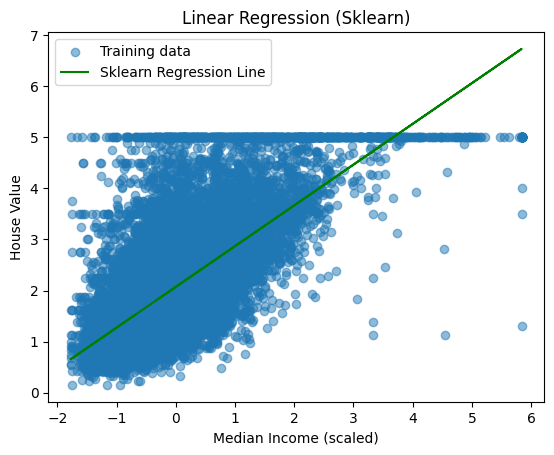

In [33]:
# Visualize
plt.scatter(X_train_scaled, y_train, alpha=0.5, label="Training data")
plt.plot(X_train_scaled, weight_sklearn * X_train_scaled + bias_sklearn, color="green", label="Sklearn Regression Line")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.title("Linear Regression (Sklearn)")
plt.legend()
plt.show()

In [39]:
# 3 .Implement Batch Gradient Descent from Scratch (Fixed)
def batch_gradient_descent(X, y, lr=0.1, epochs=1000):
    # ensures y is 1D
    y = y.ravel()

    m = X.shape[0]
    w, b = 0.0, 0.0
    cost_history = []

    for epoch in range(epochs):
        y_hat = w * X.flatten() + b
        error = y_hat - y

        dw = (1/m) * np.dot(X.flatten(), error)
        db = (1/m) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

    return w, b, cost_history



In [40]:
# Run GD
w_gd, b_gd, cost_history = batch_gradient_descent(X_train_scaled, y_train, lr=0.1, epochs=1000)
print(f"\nBatch Gradient Descent Parameters: w = {w_gd:.4f}, b = {b_gd:.4f}")

Epoch 0: Cost=2.8149, w=0.0799, b=0.2072
Epoch 100: Cost=0.3496, w=0.7985, b=2.0719
Epoch 200: Cost=0.3496, w=0.7985, b=2.0719
Epoch 300: Cost=0.3496, w=0.7985, b=2.0719
Epoch 400: Cost=0.3496, w=0.7985, b=2.0719
Epoch 500: Cost=0.3496, w=0.7985, b=2.0719
Epoch 600: Cost=0.3496, w=0.7985, b=2.0719
Epoch 700: Cost=0.3496, w=0.7985, b=2.0719
Epoch 800: Cost=0.3496, w=0.7985, b=2.0719
Epoch 900: Cost=0.3496, w=0.7985, b=2.0719

Batch Gradient Descent Parameters: w = 0.7985, b = 2.0719


In [41]:
# Predictions
y_pred_gd = w_gd * X_test_scaled.flatten() + b_gd
print("Batch GD MSE:", mean_squared_error(y_test, y_pred_gd))

Batch GD MSE: 0.7091157771765548


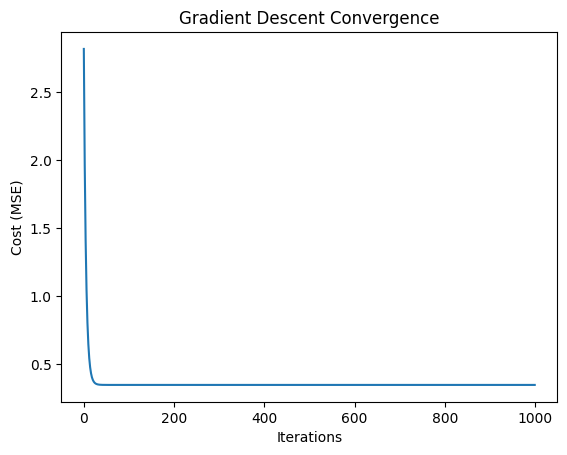

In [42]:
# 4. Convergence
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

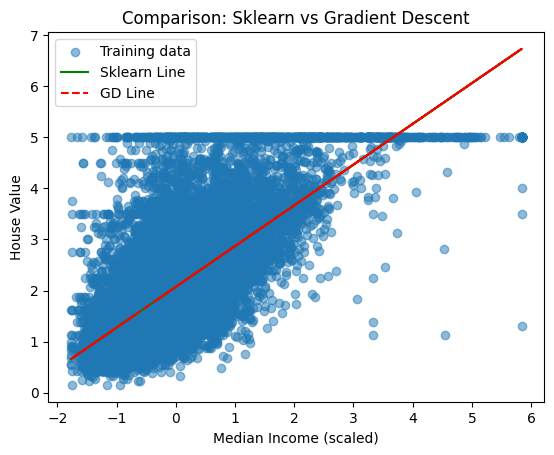

In [43]:
# 5. Visualize Regression Lines Comparison
plt.scatter(X_train_scaled, y_train, alpha=0.5, label="Training data")
plt.plot(X_train_scaled, weight_sklearn * X_train_scaled + bias_sklearn, color="green", label="Sklearn Line")
plt.plot(X_train_scaled, w_gd * X_train_scaled + b_gd, color="red", linestyle="--", label="GD Line")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.title("Comparison: Sklearn vs Gradient Descent")
plt.legend()
plt.show()

###**Effect of Learnring rate on Gradient Descent**
The **learning rate (α)** is a **hyperparameter that controls the size of each step** Gradient Descent takes while moving downhill on the loss surface.  

Epoch 0: Cost=2.8149, w=0.0008, b=0.0021
Epoch 100: Cost=2.3678, w=0.0767, b=0.1991
Epoch 200: Cost=2.0018, w=0.1455, b=0.3774
Epoch 300: Cost=1.7022, w=0.2076, b=0.5388
Epoch 400: Cost=1.4569, w=0.2639, b=0.6847
Epoch 0: Cost=2.8149, w=0.0080, b=0.0207
Epoch 100: Cost=0.6799, w=0.5092, b=1.3211
Epoch 200: Cost=0.3938, w=0.6926, b=1.7971
Epoch 300: Cost=0.3555, w=0.7598, b=1.9714
Epoch 400: Cost=0.3504, w=0.7843, b=2.0351
Epoch 0: Cost=2.8149, w=0.0799, b=0.2072
Epoch 100: Cost=0.3496, w=0.7985, b=2.0719
Epoch 200: Cost=0.3496, w=0.7985, b=2.0719
Epoch 300: Cost=0.3496, w=0.7985, b=2.0719
Epoch 400: Cost=0.3496, w=0.7985, b=2.0719
Epoch 0: Cost=2.8149, w=0.3993, b=1.0360
Epoch 100: Cost=0.3496, w=0.7985, b=2.0719
Epoch 200: Cost=0.3496, w=0.7985, b=2.0719
Epoch 300: Cost=0.3496, w=0.7985, b=2.0719
Epoch 400: Cost=0.3496, w=0.7985, b=2.0719


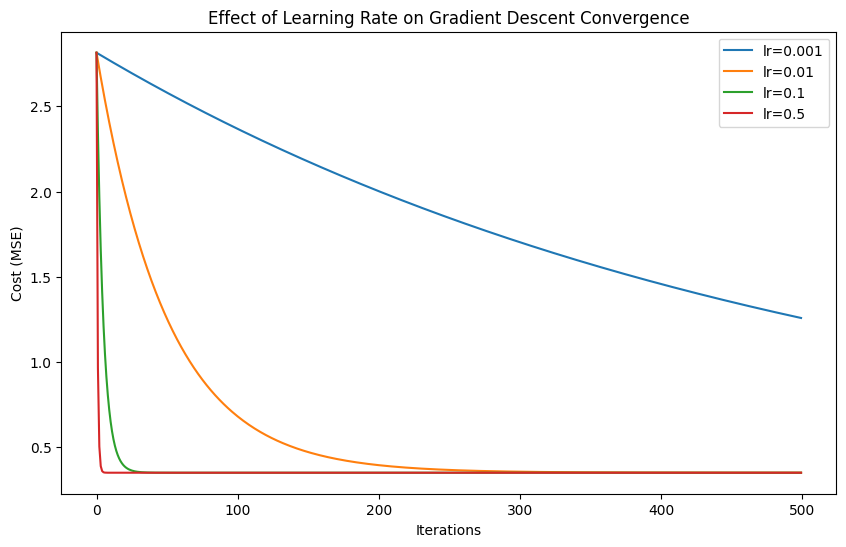

In [46]:
learning_rates = [0.001, 0.01, 0.1, 0.5]  # small to large
epochs = 500

plt.figure(figsize=(10,6))

for lr in learning_rates:
    _, _, cost_history = batch_gradient_descent(X_train_scaled, y_train, lr=lr, epochs=epochs)
    plt.plot(range(epochs), cost_history, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Effect of Learning Rate on Gradient Descent Convergence")
plt.legend()
plt.show()


### Observations

- **Too small (lr=0.001):** Learning is very slow; takes many iterations to reach minimum.  
- **Moderate (lr=0.01, 0.1):** Converges smoothly and quickly to minimum — ideal range.  
- **Too large (lr=0.5):** May overshoot or bounce around; convergence is unstable.  

*Takeaway:*  
The **learning rate controls the step size** when walking downhill.  
Choosing it wisely ensures **fast, stable convergence** without overshooting.  
Experimenting like this builds **intuition about optimization**, not just coding skills.


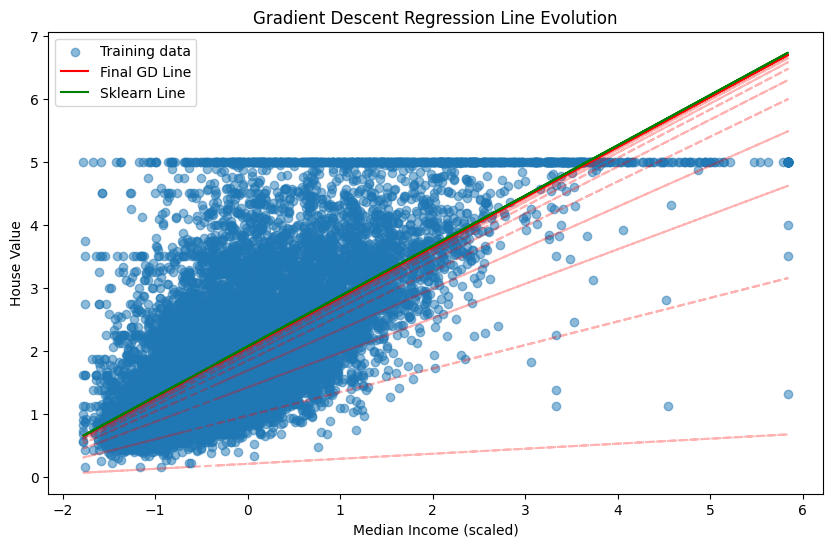

In [49]:
epochs = 50
lr = 0.1
w, b = 0.0, 0.0

plt.figure(figsize=(10,6))
plt.scatter(X_train_scaled, y_train, alpha=0.5, label="Training data")

for epoch in range(epochs):
    y_hat = w * X_train_scaled.flatten() + b
    error = y_hat - y_train.ravel()

    # Update parameters
    dw = (1/len(X_train_scaled)) * np.dot(X_train_scaled.flatten(), error)
    db = (1/len(X_train_scaled)) * np.sum(error)
    w -= lr * dw
    b -= lr * db

    # Plot every 5 iterations
    if epoch % 5 == 0:
        plt.plot(X_train_scaled, w * X_train_scaled + b, linestyle='--', alpha=0.3, color='red')

# Final GD line
plt.plot(X_train_scaled, w * X_train_scaled + b, color='red', label="Final GD Line")
# Sklearn line for reference
plt.plot(X_train_scaled, weight_sklearn * X_train_scaled + bias_sklearn, color='green', label="Sklearn Line")

plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.title("Gradient Descent Regression Line Evolution")
plt.legend()
plt.show()


### Observations

- The **red dashed lines** show how GD updates the line gradually over iterations.  
- You can see the line **“walks” toward the optimal solution**, guided by the slope of the loss.  
- The **final red line** overlaps almost perfectly with the **green Sklearn line**, confirming GD converged.  

*Takeaway:*  
This visualization makes it clear that Gradient Descent is **iterative learning**, not magic — each step is a small adjustment toward reducing error.


## Final Summary & Takeaways

In this notebook, I explored **Gradient Descent** from scratch, step by step, to truly understand how optimization works in machine learning.

### Key Learnings:

1. **Gradient Descent vs Linear Regression (Sklearn)**  
   - Sklearn finds the solution **analytically** (shortcut),  
   - Gradient Descent **iteratively walks downhill**, learning from error at each step.  
   - Both converge to **same parameters and MSE**, proving GD works.

2. **Learning Rate is Critical**  
   - Too small → slow convergence  
   - Just right → stable, efficient learning  
   - Too large → may diverge or oscillate  
   - Visualizing cost over iterations helps pick the right learning rate.

3. **Visualization Helps Build Intuition**  
   - Cost vs iterations shows how GD minimizes loss.  
   - Regression line evolution shows how the model **gradually adjusts to fit data**.  
   - Scaling features ensures smooth convergence.

4. **Real World Perspective**  
   - GD is like feeling the slope and taking careful steps to reach the valley.  
   - Each parameter is a “knob” we adjust gradually to reduce error.  
   - This perspective builds **intuition about optimization**, not just coding ability.

### Final Thoughts

By implementing Gradient Descent from scratch and comparing it with Sklearn’s Linear Regression, I now deeply understand:  

- How **iterative optimization works**  
- How **learning rate affects convergence**  
- How to **visualize the learning process** for better intuition  

This notebook reflects my **learning journey**, not just a tutorial. My goal was to **truly understand Gradient Descent** and **build visual intuition**, which I can now confidently apply to more complex models.


---

🙏 Thank you for taking the time to read through this notebook!  
I hope you found it useful and enjoyable.

If you have any questions or suggestions, feel free to connect with me.  
You can also check out my other projects here:  
🔗 [My GitHub](https://github.com/Aman-sys-ui)
